In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [4]:
# Outcome이 우리가 예측해야할 데이터
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [7]:
# 8:2 비율로 구하기 위해 전체 데이터 행에서 80% 위치에 해당되는 값을 구한다
split_count = int(df.shape[0] * 0.8)
split_count

614

In [11]:
# train, test 데이터 나누기
# 깊은 복사
train = df[:split_count].copy()
train.shape

(614, 9)

In [13]:
test = df[split_count:].copy()
test.shape

(154, 9)

## 학습, 예측에 사용할 컬럼

In [16]:
# 마지막 컬럼(Outcome)을 제외한 나머지 컬럼을 리스트로 만든 후, 변수에 넣어주기
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 정답값이자 예측해야될 값

In [17]:
# feature_names는 여러 값을 갖고 있으므로 리스트로 만들어주었고, label_name은 값이 하나이므로 리스트로 만들지 않았다!
label_name = train.columns[-1]
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [20]:
# 학습 세트 만들기 (예) 시험의 기출 문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
# 정답 만들기 (예) 기출 문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

# 이때 정답과 문제의 행의 개수가 똑같아야 한다! (614개)
# 문제는 대문자 X, 정답은 소문자 y
# X는 행렬로 구성, y는 벡터로 구성

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
# 예측에 사용할 데이터셋 만들기 (예) 실전 시험 문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

# 실제 시험 문제에서도 기출 문제와 컬럼 개수가 똑같아야 한다! (8개)

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [25]:
# 예측의 정답값 (예) 실전 시험 문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [36]:
# 분류 문제이니 Classifier로!
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model

# 스무고개와도 같은 알고리즘이다.
# 질문에 꼬리에 꼬리를 물고 내려가면서.. 당뇨병인지 아닌지 여부를 판단한다.

DecisionTreeClassifier()

## 학습(훈련)

In [37]:
# 시험을 볼 때 기출 문제(X_train)와 정답(y_train)을 보고 공부하는 과정이라 생각하면 된다.
# 모델에 기출 문제와 정답을 넣어주면 알아서 학습한다
model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측

In [38]:
# 실전 시험 문제(X_test)라고 생각하면 된다. 우리가 정답을 직접 예측한다
# X만 넣어주고 정답을 따로 넣어주지는 않는다.
# 실제로 시험장 가서도 정답이 따로 없잖아? 그것마냥
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

## 트리 알고리즘 분석하기
- 의사결정나무 시각화

[Text(0.5704978813559322, 0.9705882352941176, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.18788841807909604, 0.9117647058823529, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(0.03615819209039548, 0.8529411764705882, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(0.01807909604519774, 0.7941176470588235, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.00903954802259887, 0.7352941176470589, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(0.02711864406779661, 0.7352941176470589, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.01807909604519774, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03615819209039548, 0.6764705882352942, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.05423728813559322, 0.7941176470588235, 'BloodPressure <= 56.0\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),

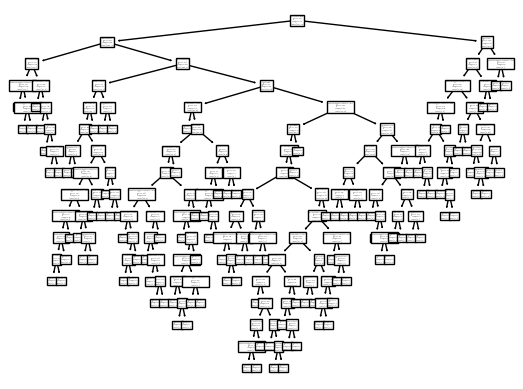

In [39]:
from sklearn.tree import plot_tree

# 텍스트로 tree가 나온다
plot_tree(model, feature_names=feature_names)

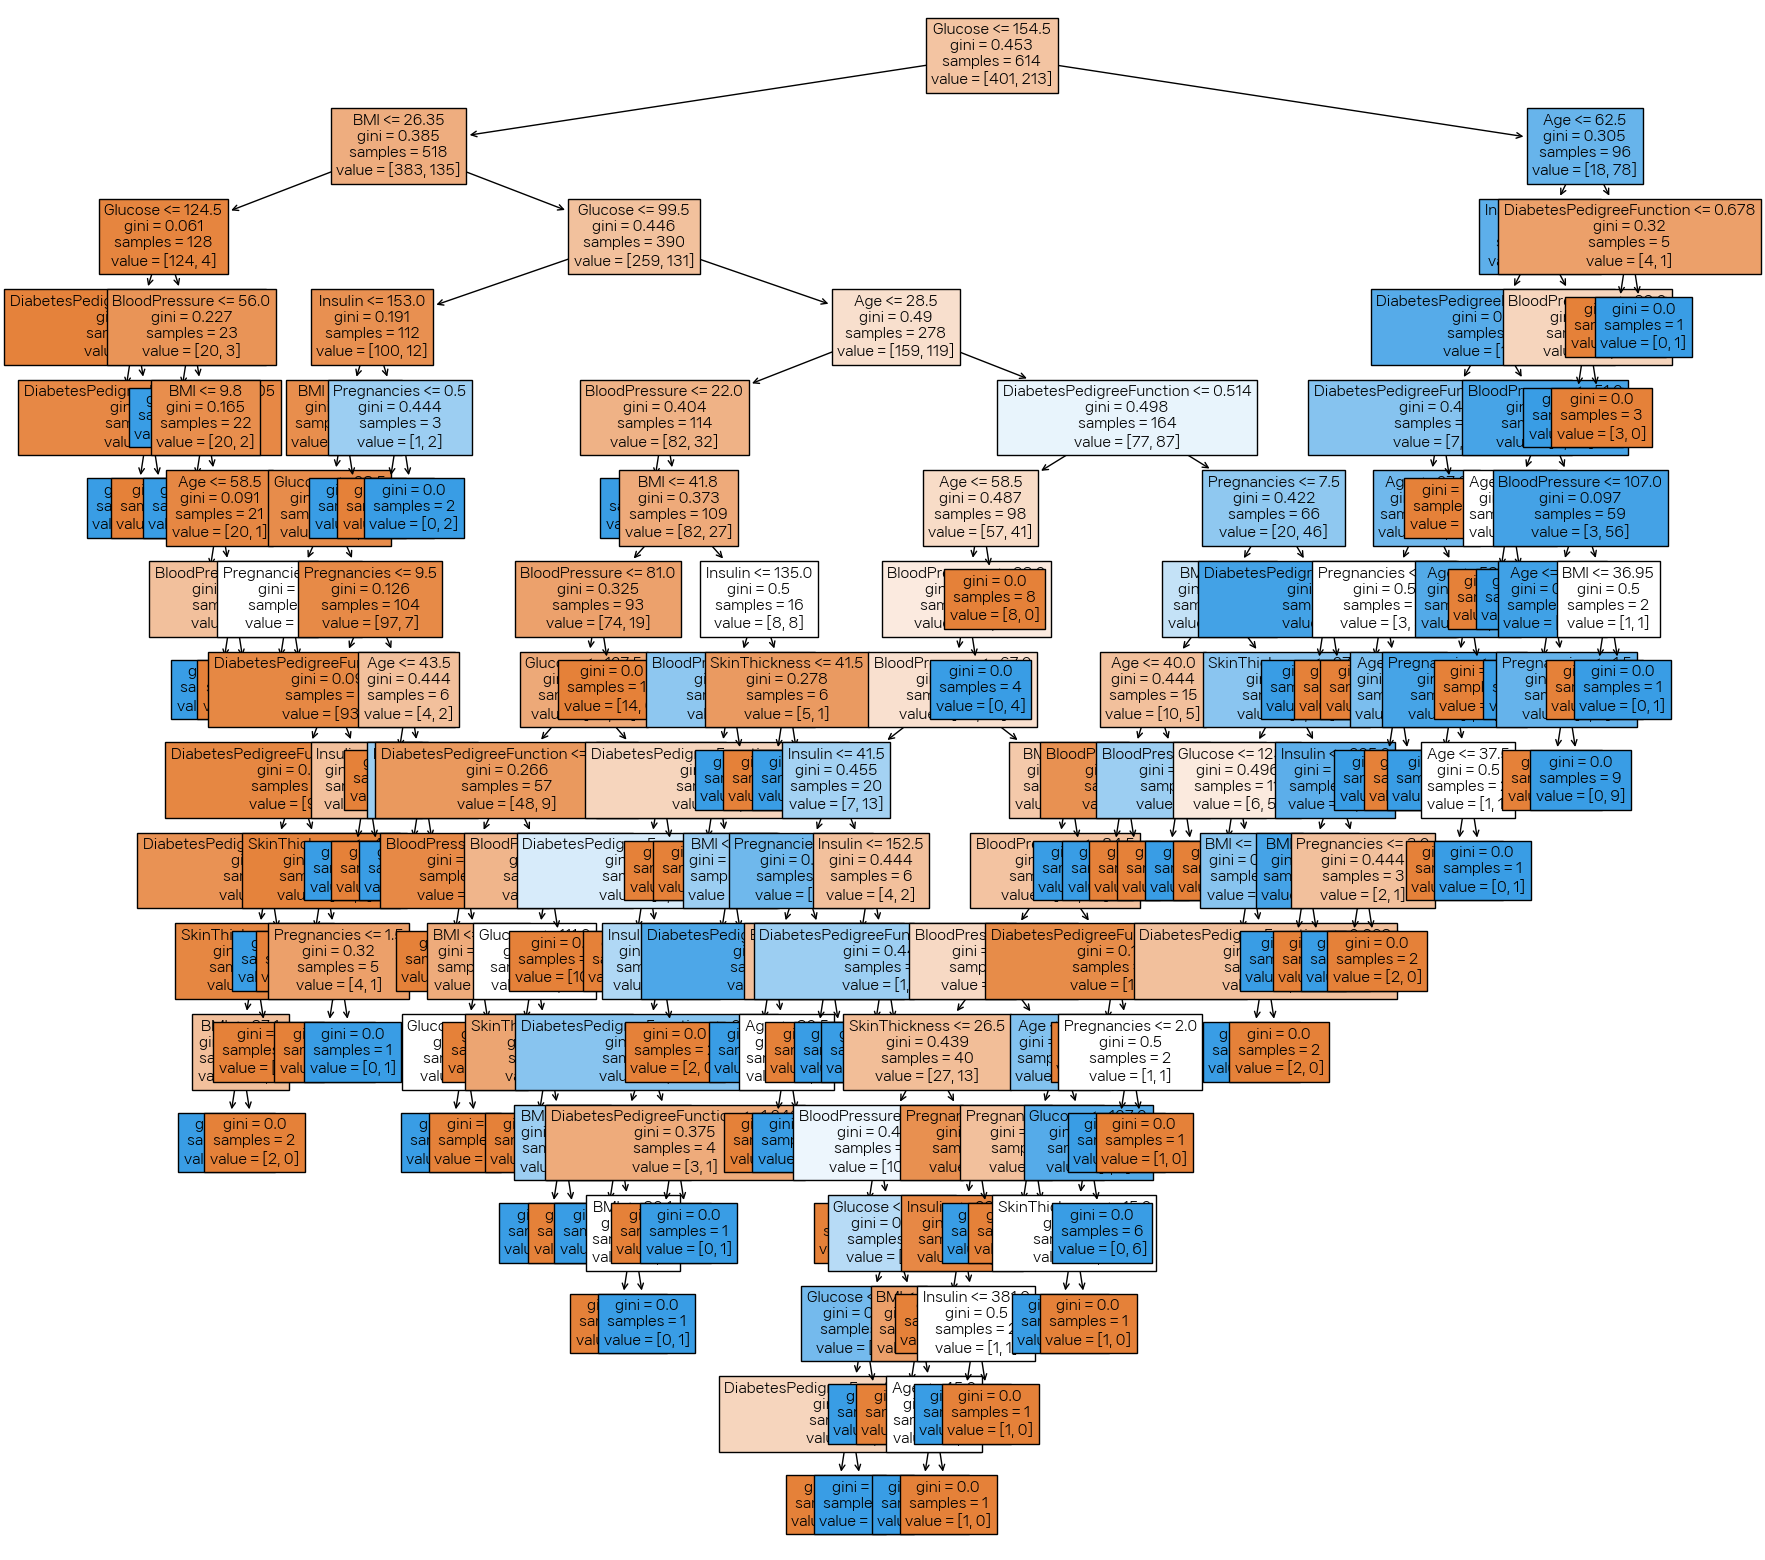

In [41]:
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                filled=True, fontsize=10)

In [42]:
# 피처의 중요도 추출하기
# 우리가 지정한 피처의 순서에 따른 중요도 
model.feature_importances_

array([0.08222403, 0.31047145, 0.13300354, 0.03993302, 0.06271213,
       0.14094141, 0.12344426, 0.10727016])

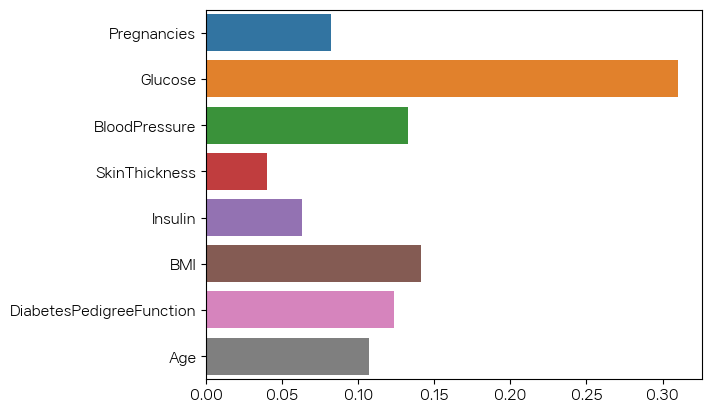

In [48]:
# 피처 중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names);

## 정확도 측정하기

In [55]:
# 실제값 - 예측값을 하면 같은 값은 0으로 나올 것이다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.
abs(y_test - y_predict).sum() / len(y_test) # 잘못 예측한 비율

diff_count = abs(y_test - y_predict).sum() # 잘못 예측한 값
diff_count
# 1-잘못 예측한 값 =  우리가 잘 예측한 값

41

In [56]:
# 예측의 정확도 구하기 (100점 만 점 중 몇 점?)
(len(y_test) - diff_count) / (len(y_test)) * 100 

73.37662337662337

In [58]:
# 위에처럼 직접 구할 수도 있지만, 미리 구현된 알고리즘을 가져와 사용할 수도 있다
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

73.37662337662337

In [60]:
# model의 score로 점수를 계산하기
# 정답값을 알고 있을 때 사용 가능(y_test)
model.score(X_test, y_test) * 100

73.37662337662337